In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

##EDA##

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/movie_dataset.csv')
list(movies.columns)

['index',
 'budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'director']

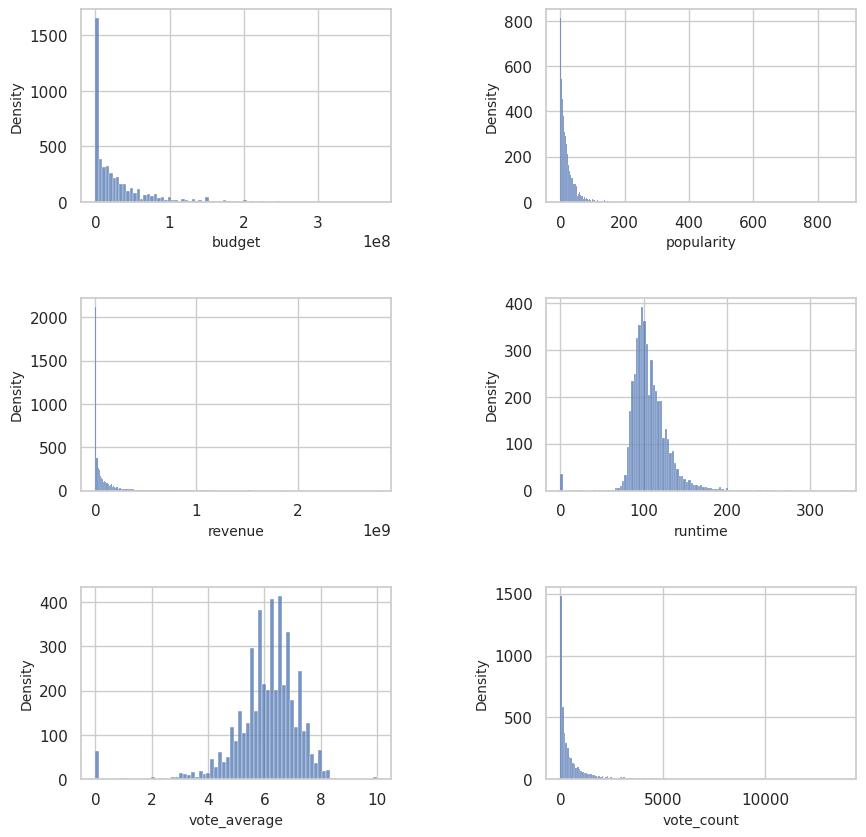

In [ ]:
sns.set(style="whitegrid")
numeric_vars = movies.select_dtypes(include=np.number).columns.drop(['id','index'])
num_rows = ((len(numeric_vars) + 1)//2)

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    sns.histplot(movies, x=col, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

##Data Pre-processing##




In [ ]:
movies['release_year']=pd.to_datetime(movies['release_date']).dt.year
movies['title']=movies['title'].str.lower()

selected_features = ['id', 'title', 'popularity', 'vote_average', 'vote_count', 'genres', 'cast', 'director', 'keywords','overview',
                     'release_year', 'tagline']
movies=movies[selected_features]

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value="")
movies = pd.DataFrame(imputer.fit_transform(movies),columns=selected_features)
movies

,id,title,popularity,vote_average,vote_count,genres,cast,director,keywords,overview,release_year,tagline
0,19995,avatar,150.437577,7.2,11800,Action Adventure Fantasy Science Fiction,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",2009.0,Enter the World of Pandora.
1,285,pirates of the caribbean: at world's end,139.082615,6.9,4500,Adventure Fantasy Action,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",2007.0,"At the end of the world, the adventure begins."
2,206647,spectre,107.376788,6.3,4466,Action Adventure Crime,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,2015.0,A Plan No One Escapes
3,49026,the dark knight rises,112.31295,7.6,9106,Action Crime Drama Thriller,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,2012.0,The Legend Ends
4,49529,john carter,43.926995,6.1,2124,Action Adventure Science Fiction,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",2012.0,"Lost in our world, found in another."
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,el mariachi,14.269792,6.6,238,Action Crime Thriller,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,united states\u2013mexico barrier legs arms pa...,El Mariachi just wants to play his guitar and ...,1992.0,"He didn't come looking for trouble, but troubl..."
4799,72766,newlyweds,0.642552,5.9,5,Comedy Romance,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,,A newlywed couple's honeymoon is upended by th...,2011.0,A newlywed couple's honeymoon is upended by th...
4800,231617,"signed, sealed, delivered",1.444476,7.0,6,Comedy Drama Romance TV Movie,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,date love at first sight narration investigati...,"""Signed, Sealed, Delivered"" introduces a dedic...",2013.0,
4801,126186,shanghai calling,0.857008,5.7,7,,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,,When ambitious New York attorney Sam is sent t...,2012.0,A New Yorker in Shanghai


In [ ]:
cat_vars = ['title','genres','director','keywords','overview','tagline']
movie_vectors = movies[cat_vars]
movie_vectors = movie_vectors.apply(lambda x: ' '.join(x.astype(str)), axis=1)

##Creating movie vectors##

In [ ]:
cvec = CountVectorizer()
movie_vectors = cvec.fit_transform(list(movie_vectors))
movie_vectors.toarray()

##Recommending movies##

In [ ]:
def recommend_similar_movies(movie_title):

  movie_title = movie_title.lower()
  movie_index = movies.loc[movies['title'] == movie_title].index

  if len(movie_index) == 0:
        print(f"Movie titled '{movie_title}' not found.")
        return

  cos_sim = []

  for i in range(movie_vectors.shape[0]):
    if i != movie_index:
      similarity = cosine_similarity(movie_vectors[movie_index], movie_vectors[i])
      cos_sim.append((i, similarity))

  cos_sim.sort(key=lambda x: x[1], reverse=True)
  k = 10
  print(f"top {k} similar movies:")
  for (i,_) in cos_sim[0:k]:
    print(movies.iloc[i]['title'])

In [ ]:
recommend_similar_movies('iron man')

top 10 similar movies:
iron man 3
iron man 2
spawn
avengers: age of ultron
guardians of the galaxy
captain america: civil war
the cave
ant-man
spider-man 2
watchmen
